In [257]:
#%%capture
%run '5_FeatureEngineering.ipynb'

In [ ]:
# Logistic Regression (base?) - line model:



### Train Test Split

In [279]:
from sklearn.model_selection import train_test_split

# erst train - test - split, dann remove imbalance of data;

# Defining X and y
features = df_cleaned.columns.tolist()
features.remove('bank_account_Yes')

X = df_cleaned[features]
y = df_cleaned.bank_account_Yes

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (17643, 6)
y_train: (17643,)
X_test: (5881, 6)
y_test: (5881,)


### Reduce imbalance of data

1. Random Oversampling: Randomly duplicate examples in the minority class.
2. Random Undersampling: Randomly delete examples in the majority class.

class imblearn.over_sampling.RandomOverSampler(*, sampling_strategy='auto', random_state=None, shrinkage=None)[source]

Class to perform random over-sampling.

### Preprocessing of data

In [259]:
import imblearn
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score 

In [260]:
#Oversampling
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

display('X_train: ' + str(X_train.shape))
display('y_train: ' + str(y_train.shape))
display('X_train_over: ' + str(X_train_over.shape))
display('y_train_over: ' + str(y_train_over.shape))


'X_train: (17643, 6)'

'y_train: (17643,)'

'X_train_over: (30284, 6)'

'y_train_over: (30284,)'

In [261]:
count_yes, count_no = 0, 0

for i in y_train_over:
    if i == True: 
        count_yes += 1
    if i == False: 
        count_no += 1
print (count_yes, count_no)

15142 15142


In [262]:
#Undersampling
undersample = imblearn.under_sampling.RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

count_yes, count_no = 0, 0

for i in y_train_under:
    if i == True: 
        count_yes += 1
    if i == False: 
        count_no += 1
print (count_yes, count_no)

2501 2501


### Predictive Modelling

In [263]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error

In [264]:
X_train_over.head()

,year,household_size,age_of_respondent,location_type_Rural,cellphone_access_Yes,gender_of_respondent_Male
0,2018,1,25,False,True,True
1,2016,5,32,False,True,False
2,2016,2,68,True,True,True
3,2017,1,49,False,True,False
4,2017,3,40,True,True,False


In [265]:
### Using Logistic regression using non-scaled data

# Logistic Regression without the id field
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_over, y_train_over)

y_pred_train = log_reg.predict(X_train_over)
y_pred = log_reg.predict(X_test)

In [266]:
# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train_over, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

Accuracy on train set: 0.67
Accuracy on test set: 0.58
--------------------------------------------------------------------------------


Evaluation (see description)

The evaluation metric for this challenge is Mean Absolute error, where 1 indicates that the individual does have a bank account and 0 indicates that they do not. 

In [267]:
import pandas as pd


In [268]:
# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train_over, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

Accuracy on train set: 0.67
Accuracy on test set: 0.58
--------------------------------------------------------------------------------


In [269]:
# Print MAE of our model
print("Mean absolute error on train set:", round(mean_absolute_error(pd.DataFrame(map(int, y_train_over)), pd.DataFrame(map(int, y_pred_train))),2))
print("Mean absolute error on test set:", round(mean_absolute_error(pd.DataFrame(map(int, y_test)), pd.DataFrame(map(int, y_pred))),2))
print("--------"*10)

# Result: Model seems overfittet, da im Test-Data-Set mehr Fehler auftreten als im Trainingsdataset.
# Mean absolute error bedeutet: in wie vielen Fällen lag die Vorhersage Falsch?
# MAE = 1 - Accuracy

Mean absolute error on train set: 0.33
Mean absolute error on test set: 0.42
--------------------------------------------------------------------------------


Show confusion matrix based on predicted results

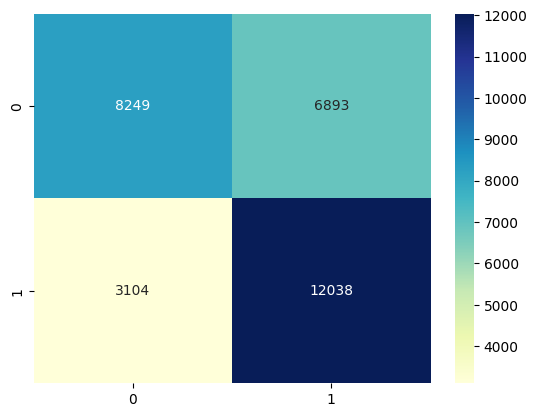

In [270]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train_over, y_pred_train)
sns.heatmap(cm_train, cmap="YlGnBu", annot=True, fmt='d');


# Das ist für das Train - Datenset

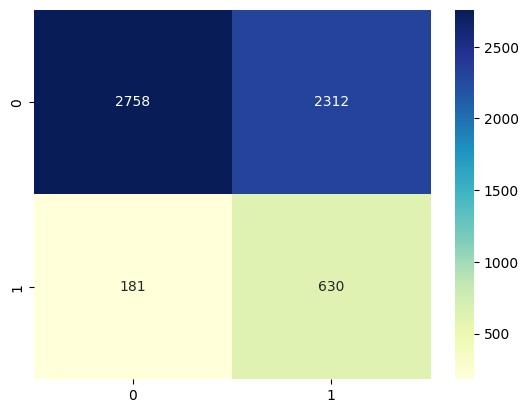

In [271]:
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, cmap="YlGnBu", annot=True, fmt='d');


### Improve Accuracy/MAE with Logistic Regression with Randomsearch CV

In [272]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import loguniform

In [273]:
# Logistic Regression
log_reg_with_randomS= LogisticRegression(max_iter=10)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


# define search space
param_grid = { "solver" : ['newton-cg', 'lbfgs', 'liblinear'],      # Hier werden die Hyperparameter definiert, die untersucht
               "penalty" : ['none', 'l1', 'l2', 'elasticnet']}      # werden sollen


# define Random search
Random_search = RandomizedSearchCV(log_reg_with_randomS, param_grid, n_iter=500, scoring='accuracy', n_jobs=1, cv=cv, random_state=1)

# execute Random search
Random_search.fit(X_train_under, y_train_under)  

/Users/kf/neuefische/Financial-Inclusion-Project/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=500. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/kf/neuefische/Financial-Inclusion-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kf/neuefische/Financial-Inclusion-Project/.venv/lib/python3.11/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/kf/neuefische/Financial-Inclusion-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past 

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=LogisticRegression(max_iter=10), n_iter=500,
                   n_jobs=1,
                   param_distributions={'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=1, scoring='accuracy')

In [274]:
y_pred_train_RS = Random_search.predict(X_train_under)
y_pred_RS = Random_search.predict(X_test)

print("Tuned hpyerparameters :(best parameters) ",Random_search.best_params_)
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred_RS), 2))

Tuned hpyerparameters :(best parameters)  {'solver': 'liblinear', 'penalty': 'l1'}
Accuracy on test set: 0.56


### Logistic regression with GridSearchCV

In [275]:
import numpy as np

In [276]:
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']

hyperparameters = dict(penalty=penalty, solver=solver)

gridsearch = GridSearchCV(log_reg, hyperparameters, scoring='accuracy',
                  cv=5, verbose=5, n_jobs=1)
gridsearch.fit(X_train_under,y_train_under)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ......penalty=l1, solver=liblinear;, score=0.667 total time=   0.1s
[CV 2/5] END ......penalty=l1, solver=liblinear;, score=0.677 total time=   0.1s
[CV 3/5] END ......penalty=l1, solver=liblinear;, score=0.691 total time=   0.1s
[CV 4/5] END ......penalty=l1, solver=liblinear;, score=0.686 total time=   0.1s
[CV 5/5] END ......penalty=l1, solver=liblinear;, score=0.658 total time=   0.1s


/Users/kf/neuefische/Financial-Inclusion-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...........penalty=l1, solver=saga;, score=0.606 total time=   0.3s


/Users/kf/neuefische/Financial-Inclusion-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...........penalty=l1, solver=saga;, score=0.595 total time=   0.3s


/Users/kf/neuefische/Financial-Inclusion-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...........penalty=l1, solver=saga;, score=0.608 total time=   0.3s


/Users/kf/neuefische/Financial-Inclusion-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...........penalty=l1, solver=saga;, score=0.607 total time=   0.3s


/Users/kf/neuefische/Financial-Inclusion-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...........penalty=l1, solver=saga;, score=0.589 total time=   0.3s
[CV 1/5] END ......penalty=l2, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/5] END ......penalty=l2, solver=liblinear;, score=0.677 total time=   0.0s
[CV 3/5] END ......penalty=l2, solver=liblinear;, score=0.691 total time=   0.0s
[CV 4/5] END ......penalty=l2, solver=liblinear;, score=0.685 total time=   0.0s
[CV 5/5] END ......penalty=l2, solver=liblinear;, score=0.657 total time=   0.0s


/Users/kf/neuefische/Financial-Inclusion-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...........penalty=l2, solver=saga;, score=0.606 total time=   0.2s


/Users/kf/neuefische/Financial-Inclusion-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...........penalty=l2, solver=saga;, score=0.594 total time=   0.2s


/Users/kf/neuefische/Financial-Inclusion-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...........penalty=l2, solver=saga;, score=0.608 total time=   0.2s


/Users/kf/neuefische/Financial-Inclusion-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...........penalty=l2, solver=saga;, score=0.606 total time=   0.2s
[CV 5/5] END ...........penalty=l2, solver=saga;, score=0.590 total time=   0.2s


/Users/kf/neuefische/Financial-Inclusion-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=1,
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=5)

In [277]:
y_pred_train_GS = gridsearch.predict(X_train_under)
y_pred_GS = gridsearch.predict(X_test)

print("Tuned hpyerparameters (best parameters): ",gridsearch.best_params_)
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred_GS), 2))

Tuned hpyerparameters (best parameters):  {'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on test set: 0.56
